# Time series preprocessing

Time series refers to data collected over time. It is a sequence of samples that were measured during some period of time, in some given intervals.

In [6]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

We shall start with a famous data set: the number of international passengers per month on Pan Am airline in the US obtained from the Fedral Aviation Administration for the period 1946-1960.

In [7]:
data = pd.read_csv('AirPassengers.csv')

In [8]:
print(data.head())
print('\n')
print(data.info())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None


ValueError: could not convert string to float: '1960-12'

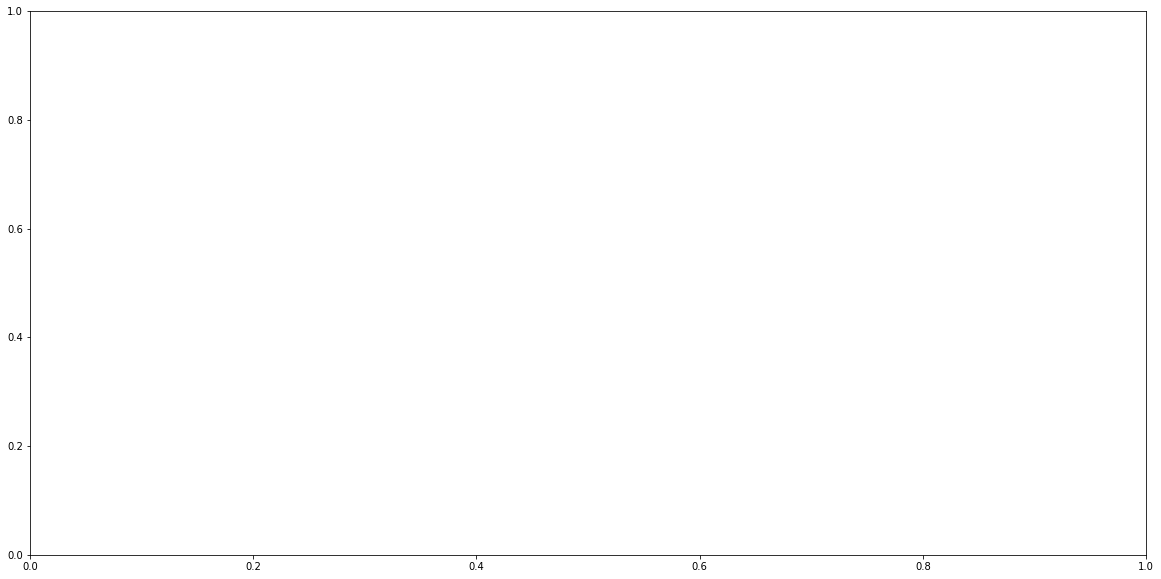

In [9]:
plt.plot(data)

In [ ]:
plt.plot(data['#Passengers'])

Pandas has support for time series - see https://pandas.pydata.org/pandas-docs/stable/timeseries.html
We shall start by making the index a time data format.

In [ ]:
data.index

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') #we need to parse the given time format
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [11]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

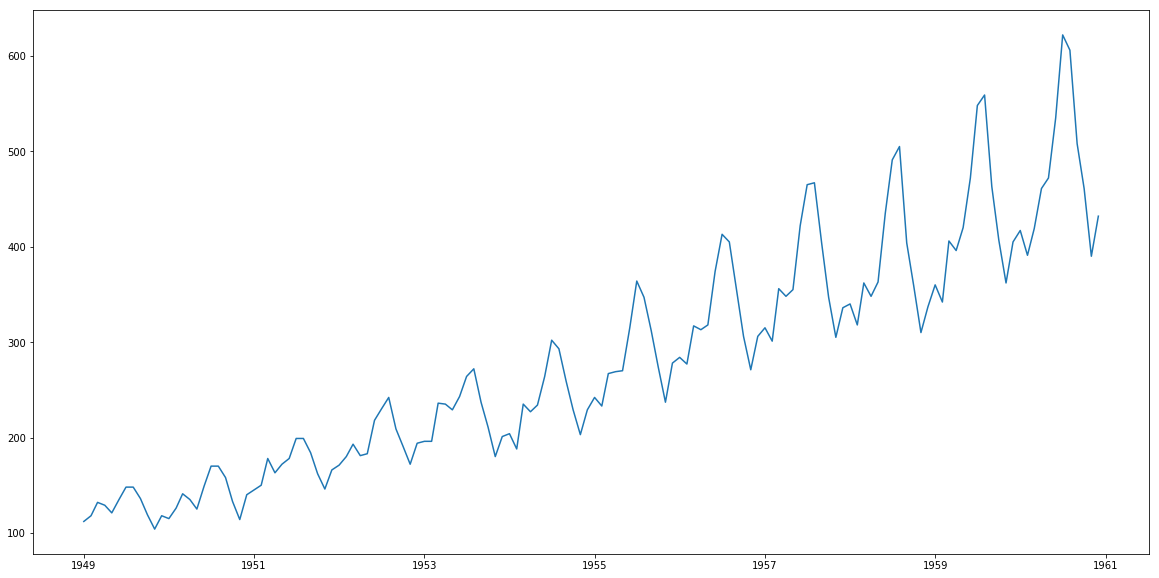

In [12]:
plt.plot(data) #this shows the labels of x-axis correctly only sometimes

In [13]:
series.plot() #this shows the x-axis ok (once done, the previous method starts to work properly?)

NameError: name 'series' is not defined

In [ ]:
series = data['#Passengers']
series.head()

In [14]:
series['1960-12-01']

NameError: name 'series' is not defined

In [15]:
# indices need to be sorted in order for the following to work properly:
series['1949-01-01':'1949-05-01']

NameError: name 'series' is not defined

In [16]:
series2 = series.sort_index(ascending=False)
print(series2.head())
print(series2['1949-01-01':'1949-05-01'])
plt.plot(series2)

NameError: name 'series' is not defined

In [17]:
from datetime import datetime
series[datetime(1955,1,1)]

NameError: name 'series' is not defined

## General concepts for time series preprocessing

First steps is to clear the data:

* Remove noise
* Remove/correct offsets
* Remove trends
* Normalize time series (?)

How these can be done?





















## Rolling window / convolution

One of the first tools to investigate statics calculated over a (weighted) window = an interval of given length which moves over the time index of the series.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

In [18]:
q = series.rolling(15, min_periods=None, center=False, win_type='boxcar', on=None, axis=0, closed=None)

NameError: name 'series' is not defined

In [19]:
q.mean()

NameError: name 'q' is not defined

In [20]:
plt.plot(q.mean())

NameError: name 'q' is not defined

In [21]:
q = series.rolling(5, center=False)
plt.plot(q.std(),q.mean()) #an artistic intermezzo

NameError: name 'series' is not defined

In [22]:
N = 12
q = series.rolling(N)
rolmean = q.mean()
rolstd = q.std()

plt.figure(figsize=(10,10))
orig = plt.plot(series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#plt.fill_between(rolmean.index, rolmean-rolstd, rolmean+rolstd)
plt.fill_between([item.strftime('%Y-%m-%d') for item in series.index], list(rolmean-rolstd), list(rolmean+rolstd),facecolor='blue', alpha=.2)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

NameError: name 'series' is not defined

This time series does not contain noise - we have integer data assumed to be correct.
There is an obvious increasing trend.
We shall try **removing the trend**.

In [23]:
# TASK 1 - remove the trend in `series` and plot the result
































In [24]:
# we shall deal with the trend using another (very simple) method (however, the data are transformed substantially)

# create a differenced series
def difference(dataset, offset=1):
	diff = list()
	for i in range(offset, len(dataset)):
		value = dataset[i] - dataset[i - offset]
		diff.append(value)
	return diff
 
# define a dataset with a linear trend
plt.plot(series,label='Original')
# difference the dataset
offset = 1
diff = difference(data.values, offset)
plt.plot(series.index[offset:],diff,label='Difference series offset='+str(offset))
plt.legend(loc='best')
plt.show()

NameError: name 'series' is not defined

### Normalization

Normalization refers (again) to the procedure of shifting and rescaling the series such that it has zero mean and variance $1$.

It makes little sense to normalize a series that contains a trend.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

values = series.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)


scaler = scaler.fit(diff)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, np.sqrt(scaler.var_)))
normalized_diff = scaler.transform(diff)


#plt.plot(series, color='blue',label='Original')
plt.plot(series.index[offset:],normalized[offset:],label='Normalized')
plt.plot(series.index[offset:],normalized_diff,label='Normalized diff')
plt.legend(loc='best')


NameError: name 'series' is not defined

Differences can also be done using pandas `shift`.
The method can also work with time index.

In [26]:
plt.plot(series-series.shift(offset))

NameError: name 'series' is not defined

In [27]:
plt.plot( (series-series.shift(offset,freq='MS')).fillna(0) )

NameError: name 'series' is not defined

### Noise reduction

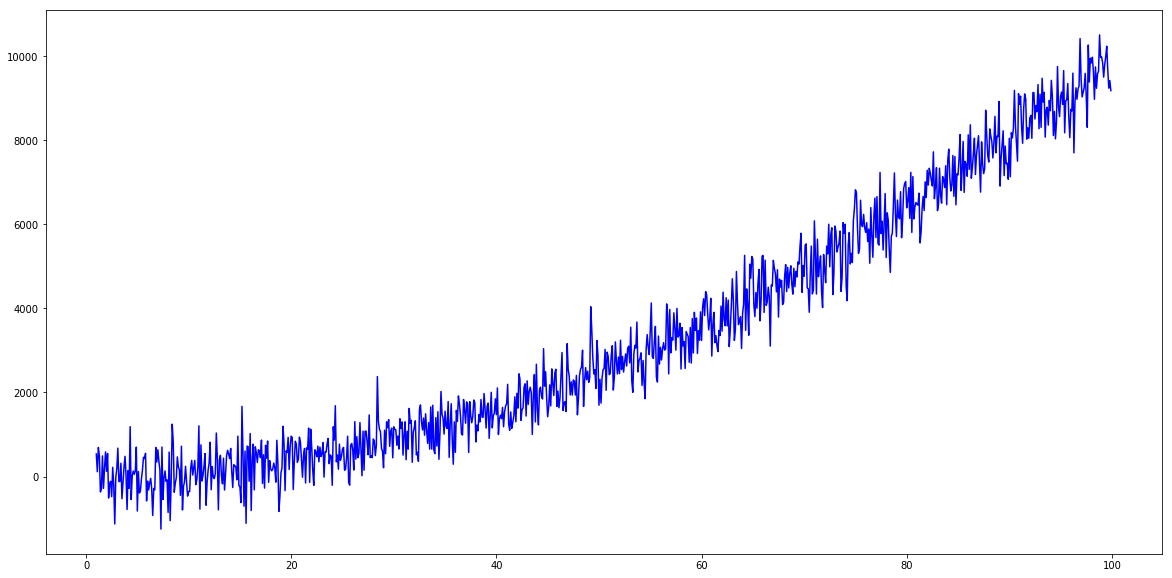

In [28]:
#Generate some data with noise

mu, sigma = 0, 500

x = np.arange(1, 100, 0.1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
y = x ** 2 + z # data
plt.plot(x, y, linestyle="-", c="b")  # it include some noise

In [29]:
# TASK 2 - remove the noise


























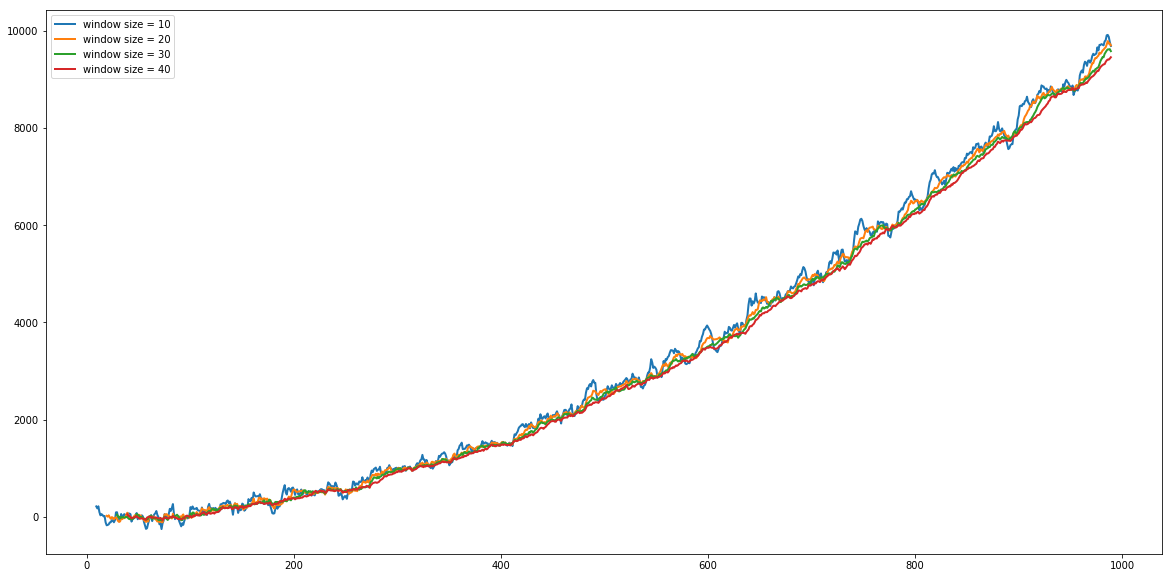

In [30]:
Y = pd.Series(y)
for window_size in [10,20,30,40]:
    plt.plot(Y.rolling(window_size).mean(),linewidth=2,label='window size = %s' % window_size)
plt.legend()

### _Seasonal decomposition_

Seasonal decomposition is a decomposition of times series using one of the two common models:

_additive_: Trend + Seasonality + Noise

_multiplicative_: Trend \* Seasonality \* Noise

We shall only quickly test the implementation http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Applications\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'series' is not defined

In [ ]:
decomposition = seasonal_decompose(series, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

More advanced techniques are available, the starting points are the keywords [Digital signal processing](https://en.wikipedia.org/wiki/Digital_signal_processing) and [Digital filter](https://en.wikipedia.org/wiki/Digital_filter).

## Time series similarity

For the two basic tasks of machine learning, prediction and classification, we have (very quickly) covered the preprocessing for prediction. For the classification task, we need to be able to tell how much are two time series similar one to another.

We start by generating a simple artificial example.

In [ ]:
x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

Is `ts1` more similar to `ts2` or to `ts3`?

In [32]:
print(np.linalg.norm(ts1-ts2))
print(np.linalg.norm(ts1-ts3))

NameError: name 'ts1' is not defined

If we use the Euclidean norm, the answer is in contradiction with our intuition.

In general, Euclidean norm is not very useful and makes little sense, although it may be enough sometimes:

In [33]:
offset = 1
diff = series-series.shift(offset,freq='MS')
diff = diff.dropna()

for N in range(1,30):
    diff1 = np.array(diff[N:].values)
    diff2 = np.array(diff[:-N].values)
    print('N=%d norm=%f' % (N,np.linalg.norm(diff1-diff2)))

NameError: name 'series' is not defined

We detect a periodic behaviour in the seasonality of `series`, and the period is 12 months!

### A short detour - Discrete Fourier Transform & friends

The Discrete Fourier Transform, and similar transform, are an important tool in digital signal processing.

In short, they transform the series, seen as a vector, to another basis, that is, they return the coordinates of the series vector in a suitable (orthonormal) basis.

In [34]:
fft_ts1 = np.fft.fft(ts1)
fft_ts2 = np.fft.fft(ts2)
fft_ts3 = np.fft.fft(ts3)

plt.plot(np.abs(fft_ts1))
plt.plot(np.abs(fft_ts2))
plt.plot(np.abs(fft_ts3))

NameError: name 'ts1' is not defined

Using Euclidean distance will yield the same result (this is Parseval's theorem).

(There is a factor since the default implementaion is not normalizing the results of DFT/FFT.)

In [35]:
print(np.linalg.norm((fft_ts1-fft_ts2)))
print(np.linalg.norm((fft_ts1-fft_ts3)))

NameError: name 'fft_ts1' is not defined

However, DFT might is used to reduce the dimension of the vectors; only the first few coefficients are taken into account as they usually are the most important for the signal.

In [36]:
plt.plot(np.abs(np.fft.fft(np.array(diff.values))))
plt.plot(np.abs(np.fft.fft(normalized_diff,axis=0))) #axis=0 is *very* importnant since `normalized_diff` has wrong shape

NameError: name 'diff' is not defined

In [37]:
import scipy
plt.plot(scipy.fftpack.dct(np.array(diff.values)))

NameError: name 'diff' is not defined

### Dynamic time warping

Dynamic time warping finds the optimal non-linear alignment between two time series. The aligment on the time axis fixes the distortions that cannot be captured when comparing coefficients having the same index (as many metrics do). Dynamic time warping is _quadratic_ in the length of the time series used.

Dynamic time warping works in the following way. Consider two time series $Q$ and $C$ of the same length $n$ where $$Q=q_1,q_2,...,q_n$$ and $$C=c_1,c_2,...,c_n.$$
We construct an $n\times n$ matrix $M$ whose $i,j^{th}$ element is the (Euclidean) distance between $q_i$ and $c_j$.
We want to find a path through this matrix that minimizes the cumulative distance.
This path then determines the optimal alignment between the two time series.
Of course, we restrict ourselves to path that have non-decreasing indices and have fixed starting end ending points.

The optimal path is usually found via dynamic programming, specifically the following recursive function:$$\gamma(i,j)=\mathrm{d}(q_i,c_j)+\min ( \gamma(i-1,j-1),\gamma(i-1,j),\gamma(i,j-1)),$$ 
where $\mathrm{d}$ is some distance.

In [38]:
# taken from https://github.com/alexminnaar/time-series-classification-and-clustering
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [39]:
print(DTWDistance(ts1,ts2))
print(DTWDistance(ts1,ts3))

NameError: name 'ts1' is not defined

We can improve the DTW distance by adding another restriction for the path: we require the path to be close the diagonal of $M$. The closeness is given by the width `w` of the stripe along the diagonal that is to contain the optimal path. In other words, we give a limit on the maximal possible time distortion that DTW can capture.

In [40]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [41]:
print(DTWDistance(ts1,ts2,10))
print(DTWDistance(ts1,ts3,10))

NameError: name 'ts1' is not defined

In [42]:
for N in range(1,15):
    diff1 = np.array(diff[N:].values)
    diff2 = np.array(diff[:-N].values)
    print('N=%d DTW=%f' % (N,DTWDistance(diff1,diff2,10)))

NameError: name 'diff' is not defined

Another similarity measure requires to build an envolepe around the base series and then test whether the tested signal falls well into this envelope.

In [43]:
#envelope

r = 3
L = [min(diff[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(diff))] #lower bound for the envelope
U = [max(diff[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(diff))] #upper bound for the envelope

plt.plot(diff)
plt.plot(diff.index,L)
plt.plot(diff.index,U)

NameError: name 'diff' is not defined

We load a more suitable data to test this approach.

In [44]:
# last column always contains the class!
train = np.genfromtxt('train.csv', delimiter='\t')
test = np.genfromtxt('test.csv', delimiter='\t')

train

array([[-0.37693558,  1.2248643 ,  0.34387438, ..., -1.3117417 ,
        -1.1971462 ,  1.        ],
       [ 0.64440621,  0.41326914, -0.86227849, ...,  0.08574208,
         0.02499741,  1.        ],
       [-0.97866735, -0.40623244,  0.82242857, ...,  0.10699555,
         0.08271546,  1.        ],
       ..., 
       [ 0.96590061,  0.64016083,  0.48085702, ..., -1.195676  ,
        -0.80364439,  6.        ],
       [ 0.35497067,  0.10965181,  0.23889694, ..., -1.7653707 ,
        -1.6753831 ,  6.        ],
       [ 0.64661651,  0.61351555,  1.1266638 , ..., -0.83334659,
        -0.26117832,  6.        ]])

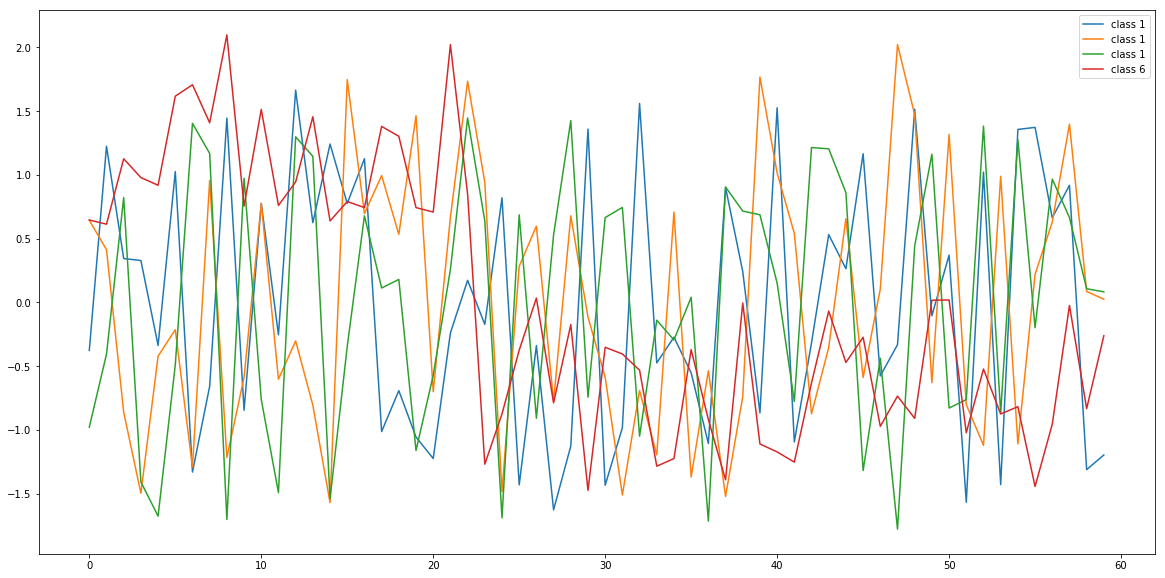

In [45]:
#plt.figure(figsize=(10,10))
plt.plot(train[0,:-1],label='class %d' % train[0,-1])
plt.plot(train[1,:-1],label='class %d' % train[1,-1])
plt.plot(train[2,:-1],label='class %d' % train[2,-1])

plt.plot(train[-1,:-1],label='class %d' % train[-1,-1])

plt.legend()

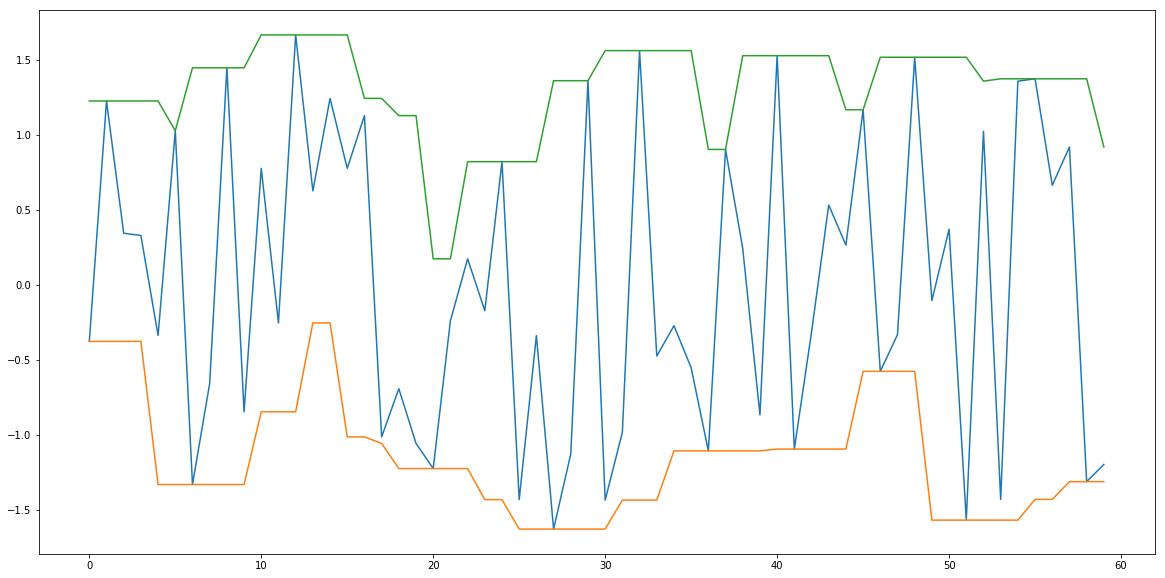

In [46]:
ts = train[0,:-1]
r = 3
L = [min(ts[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(ts))]
U = [max(ts[(ind-r if ind-r>=0 else 0):(ind+r)]) for ind in range(len(ts))]

plt.plot(ts)
plt.plot(L)
plt.plot(U)

The distance from the envelope is given by the following the _LB Keogh_ lower bound of dynamic time warping.
It is defined as $$LBKeogh(Q,C)=\sum_{i=1}^n (c_i-U_i)^2I(c_i > U_i)+(c_i-L_i)^2I(c_i < L_i)$$
where $U_i$ and $L_i$ are upper and lower bounds for time series $Q$ which are defined as $U_i=max(q_{i-r}:q_{i+r})$ and $L_i=min(q_{i-r}:q_{i+r})$ for a reach $r$ and $I(\cdot)$ is the indicator function.

Its name comes from the fact that it was originally conceived as a cheaper indicator for the DTW metric, having this property:
$$LB Keogh(Q,C) \leq DTW(Q,C)$$

In [47]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    
    
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [48]:
print(LB_Keogh(train[0,:-1],ts,5))
print(LB_Keogh(train[1,:-1],ts,5))
print(LB_Keogh(train[2,:-1],ts,5))
print(LB_Keogh(train[-1,:-1],ts,5))

0.0
1.31638750461
1.33918046413
1.0944124674


1.18928975125
1.03978645972
2.14205989518
1.27692749493
1.34999959525
1.12032054345


5.58237387228
6.41545577124
7.93836864394
7.45016002953
7.76204136991
7.42016206669


In [50]:
print(DTWDistance(train[0,:-1],ts,5))
print(DTWDistance(train[1,:-1],ts,5))
print(DTWDistance(train[2,:-1],ts,5))
print(DTWDistance(train[-1,:-1],ts,5))

0.0
5.00990737238
5.20476770961
6.89186479415


# Finish the task

1. Perform some experiments to obtain an idea the performance of `DTWDistance` and `LB_Keogh` similarity measures on `test` and `train` data using the provided class information (in the last column). In other words, try to aswer the question if one of the distances could be used for sucessful clustering of `train` and/or for classification of `test`?
1. For each class of `train`, construct its wedge (from the lecture) and use it as the envelope bounds $U$ and $L$ for a redefied `LB_Keogh` distance. Use this distance on the `test` and try to classify its elements and report on the performance of the classification (sucess percentage and confusion matrix).
1. (Optional! Bonus points will be awarded.) Perform a clustering method of your choice on `train` and compare the obtained cluster with the provided class information.

You are allowed to modify and experiment with the two measures!

In [87]:
def getClass(value,dataset):
    wantedClass = dataset[:, -1] == value
    group = train[wantedClass]
    return group  

meanLBFirstClass = 0
meanLBSecondClass = 0
meanLBThirdClass = 0
meanLBFourthClass = 0
meanLBFifthClass = 0
meanLBSixthClass = 0

meanDTWFirstClass = 0
meanDTWSecondClass = 0
meanDTWThirdClass = 0
meanDTWFourthClass = 0
meanDTWFifthClass = 0
meanDTWSixthClass = 0


for timeSerie in train:
    
    if timeSerie[-1] == 1.0:
        meanLBFirstClass += LB_Keogh(timeSerie[:-1],ts,5)
        meanDTWFirstClass += DTWDistance(timeSerie[:-1],ts,5)
    if timeSerie[-1] == 2.0:
        meanLBSecondClass += LB_Keogh(timeSerie[:-1],ts,5)
        meanDTWSecondClass += DTWDistance(timeSerie[:-1],ts,5)
    if timeSerie[-1] == 3.0:
        meanLBThirdClass += LB_Keogh(timeSerie[:-1],ts,5)
        meanDTWThirdClass += DTWDistance(timeSerie[:-1],ts,5)
    if timeSerie[-1] == 4.0:
        meanLBFourthClass += LB_Keogh(timeSerie[:-1],ts,5)
        meanDTWFourthClass += DTWDistance(timeSerie[:-1],ts,5)
    if timeSerie[-1] == 5.0:
        meanLBFifthClass += LB_Keogh(timeSerie[:-1],ts,5)
        meanDTWFifthClass += DTWDistance(timeSerie[:-1],ts,5)
    if timeSerie[-1] == 6.0:
        meanLBSixthClass += LB_Keogh(timeSerie[:-1],ts,5)
        meanDTWSixthClass += DTWDistance(timeSerie[:-1],ts,5)

meanLBFirstClass /= len(getClass(1.0,train))
meanLBSecondClass /= len(getClass(2.0,train))
meanLBThirdClass /= len(getClass(3.0,train))
meanLBFourthClass /= len(getClass(4.0,train))
meanLBFifthClass /= len(getClass(5.0,train))
meanLBSixthClass /= len(getClass(6.0,train))

meanDTWFirstClass /= len(getClass(1.0,train))
meanDTWSecondClass /= len(getClass(2.0,train))
meanDTWThirdClass /= len(getClass(3.0,train))
meanDTWFourthClass /= len(getClass(4.0,train))
meanDTWFifthClass /= len(getClass(5.0,train))
meanDTWSixthClass /= len(getClass(6.0,train))

print(meanLBFirstClass)
print(meanLBSecondClass)
print(meanLBThirdClass)
print(meanLBFourthClass)
print(meanLBFifthClass)
print(meanLBSixthClass)
print("\n")
print(meanDTWFirstClass)
print(meanDTWSecondClass)
print(meanDTWThirdClass)
print(meanDTWFourthClass)
print(meanDTWFifthClass)
print(meanDTWSixthClass)
            

1.13158934795
1.01726916476
2.10377669052
1.34584377687
1.47790513692
1.15435757935


5.39944850048
6.33065642589
8.10632239703
7.36531994371
7.9301684832
7.43996527657


I just compute the two distances between an element of the first class and all the other time series. Then I compute the average  for each class. We can see that we do not distinguish any pattern for the LB_Keogh distance but for the DTW Distance, we can see that the average distance between the element from the first class and all the others elements from the first class is the lowest one, so it's one indicator that this distance could be used for sucessful clustering of train and/or for classification of test.

In [88]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [89]:
def getClassOfTS(ts):
    return ts[-1]
    


In [90]:
def getWedge(timeSeries):
	U = np.max(timeSeries,axis=0)
	L = np.min(timeSeries,axis=0)
	
	W = [L,U]
	return W


In [91]:
def LB_KeoghRedefined(s1,givenClass,dataset):
    LB_sum=0

    timeSeries = getClass(givenClass,dataset)
    wedge = getWedge(timeSeries)
    L = wedge[0]
    U = wedge[1]

    for ind,i in enumerate(s1):
        
        lower_bound = L[ind]
        upper_bound = U[ind]
        
        #print("lower bound",lower_bound)
        #print("upper bound", upper_bound)

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)



In [92]:
import random

#trainingSet = train[:,:-1]
#testingSet = train[:,:-1]

def testNewDistance(trainingSet,testingSet):
    classes = [1.0,2.0,3.0,4.0,5.0,6.0]

    for givenClass1 in classes:
        #we get all the timeSeries of a given class
        timeSeries = getClass(givenClass1,testingSet)
        randomTS = timeSeries[random.randint(0,len(timeSeries)),:-1]
        print("Random Time Serie of class ",givenClass1)
        for givenClass2 in classes:
            #for all classes we calculate the distance of a random element of all classes
            #timeSeries = getClass(givenClass2,dataset)
            distance = LB_KeoghRedefined(randomTS,givenClass2,trainingSet)
            print("		LB_Keogh Redefined Distance of the element from the class",givenClass1,"from the class",givenClass2, " : ", distance)
            
testNewDistance(train,test)

Random Time Serie of class  1.0
		LB_Keogh Redefined Distance of the element from the class 1.0 from the class 1.0  :  0.0
		LB_Keogh Redefined Distance of the element from the class 1.0 from the class 2.0  :  3.3287861879
		LB_Keogh Redefined Distance of the element from the class 1.0 from the class 3.0  :  3.64456330317
		LB_Keogh Redefined Distance of the element from the class 1.0 from the class 4.0  :  5.89941312436
		LB_Keogh Redefined Distance of the element from the class 1.0 from the class 5.0  :  2.50339738476
		LB_Keogh Redefined Distance of the element from the class 1.0 from the class 6.0  :  4.65246187779
Random Time Serie of class  2.0
		LB_Keogh Redefined Distance of the element from the class 2.0 from the class 1.0  :  0.207912224084
		LB_Keogh Redefined Distance of the element from the class 2.0 from the class 2.0  :  0.0
		LB_Keogh Redefined Distance of the element from the class 2.0 from the class 3.0  :  4.65365109575
		LB_Keogh Redefined Distance of the element fr

 This new distance seems useful for classification, let's try to predict testing data

In [93]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
import itertools

def predictWithNewDistance(trainingSet,testingSet):
    classes = [1.0,2.0,3.0,4.0,5.0,6.0]
    distances = np.zeros(len(classes))
    y_true = testingSet[:,-1]
    y_pred = np.zeros(len(testingSet[:,-1]))
    
    testingSet = testingSet[:,:-1]
    
    for index, ts in enumerate(testingSet):
        for i in range (len(classes)):
            distances[i] = LB_KeoghRedefined(ts,classes[i],trainingSet)
        #print(distances)
        index_min = min(range(len(distances)), key=distances.__getitem__)
        y_pred[index] = float(index_min + 1) 
    
    loss = zero_one_loss(y_true, y_pred)
    cnf_matrix = confusion_matrix(y_true, y_pred)
    print(loss)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes,title='Unnormalized confusion matrix')
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,title='Normalized confusion matrix')
      
    plt.show()



0.266666666667


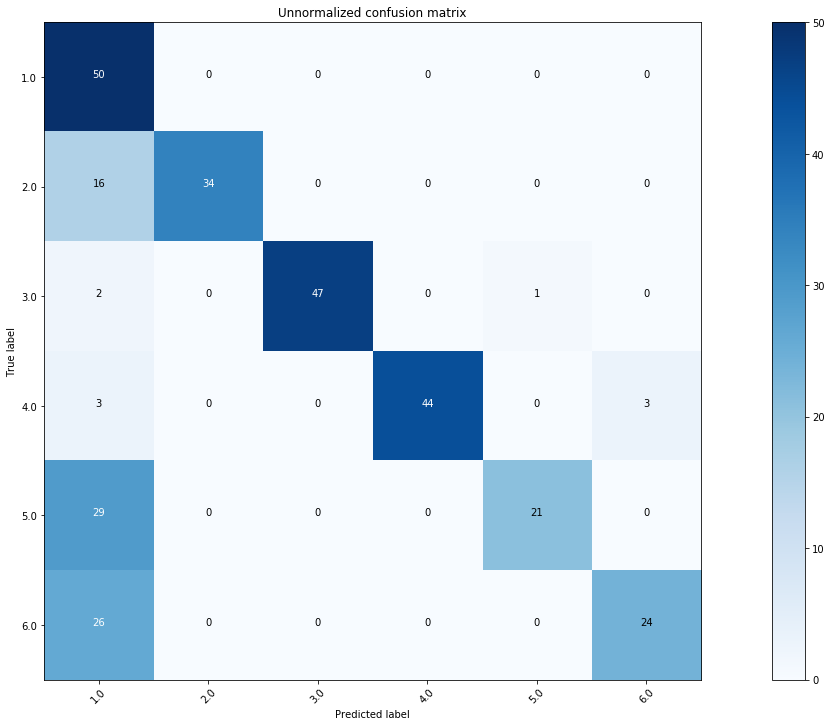

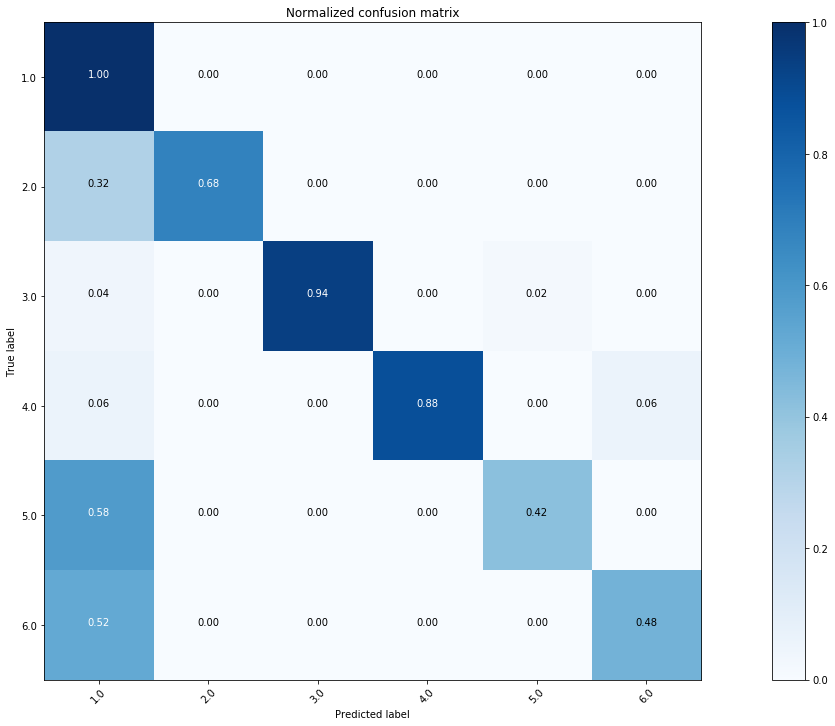

In [94]:
predictWithNewDistance(train,test)

We have around 26% of error with the 0/1 loss function, wee see that the distance works well but not so much with classes 5 and 6, they're often classified as class 1.

0.133333333333
[[21 14  4  4  6  1]
 [ 0 50  0  0  0  0]
 [ 0  0 50  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  4  0 46  0]
 [ 0  0  0  7  0 43]]


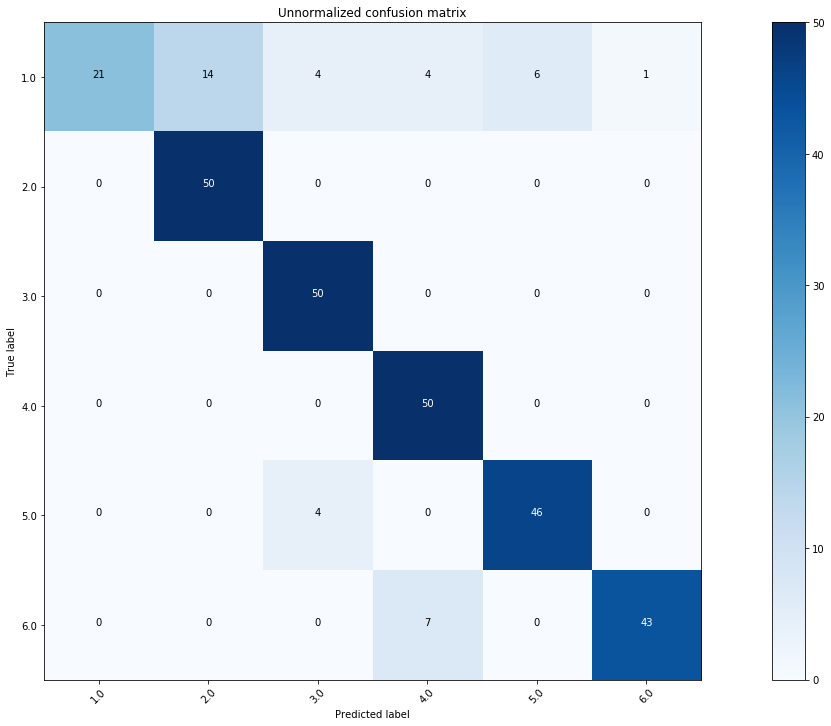

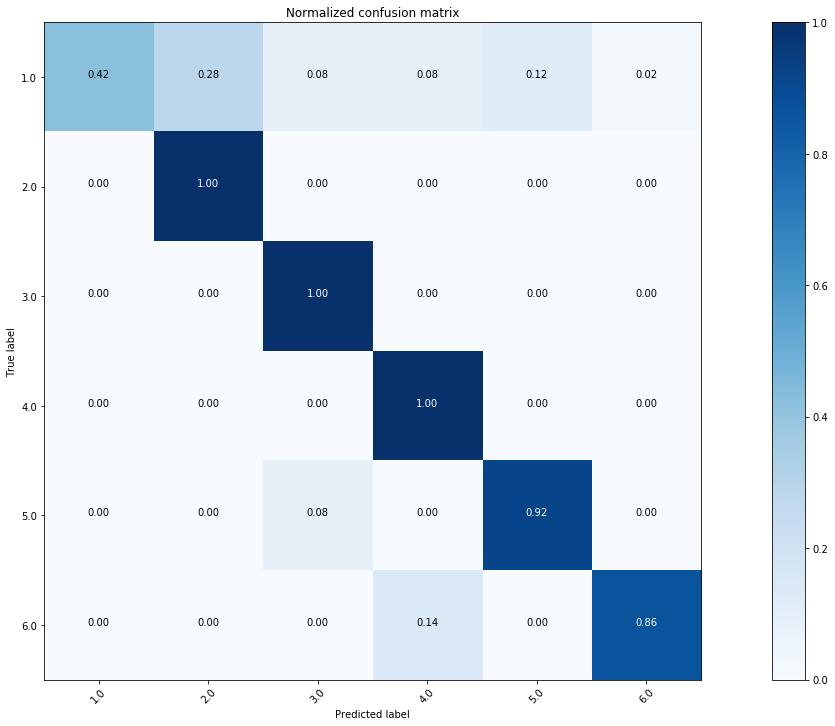

In [95]:
from sklearn.neighbors import KNeighborsClassifier

classes = [1.0,2.0,3.0,4.0,5.0,6.0]

clf = KNeighborsClassifier(6)

X_train = train[:,:-1]
X_test = test[:,:-1]

y_train = train[:,-1]
y_test = test[:,-1]

y_pred = clf.fit(X_train,y_train).predict(X_test)

loss = zero_one_loss(y_test, y_pred)

print(loss)

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,title='Unnormalized confusion matrix')
    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,title='Normalized confusion matrix')
      
plt.show()

With KNN we only get 13% of error, which is two times better than with LB_Keogh. Here it's the first class which is often missclassified